This is a poc aimed to see the benefit and power of using **VAEX** for big datasets

(taken from [link1](https://nbviewer.jupyter.org/github/vaexio/vaex-examples/blob/master/medium-nyc-taxi-data-eda/vaex-taxi-article.ipynb) and [link2](https://brendanhasz.github.io/2018/12/15/quantile-regression))

# Imports

In [38]:
import vaex
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaex.ui.colormaps import cm_plusmin

In [5]:
data_path = '/Users/jeremy/data/yellow_taxi_big_data/yellow_taxi_2009_2015_f32.hdf5'

In [6]:
from timeit import default_timer as timer
def time_it(function):
    def wrapper():
        start_time = timer()
        fun = function()
        print('Execution time: {:.4f} seconds'.format(timer() - start_time))
        return fun
    return wrapper

In [7]:
df = vaex.open(data_path)

In [8]:
df.head()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7319,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7204,3.7,0,nan,0,0,3.7
5,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6
6,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7
7,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6
8,CMT,2009-01-05 16:29:02.000000000,2009-01-05 16:40:21.000000000,1,Credit,1.6,-73.9697,40.7492,nan,nan,-73.9904,40.7511,8.7,0,nan,1.3,0,10
9,CMT,2009-01-05 18:53:13.000000000,2009-01-05 18:57:45.000000000,1,Cash,0.7,-73.9552,40.783,nan,nan,-73.9586,40.7748,5.9,0,nan,0,0,5.9


In [9]:
df.column_names

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'payment_type',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

In [10]:
@time_it
def describe():
    return df.describe()

describe()

Execution time: 268.5009 seconds


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
data_type,large_string,datetime64[ns],datetime64[ns],int64,large_string,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057926,1002161871,638914438,1173043432,1173050240,1173057925,1173057925,1032017356,1173057925,1173057925,1173057925
NA,0,0,0,0,0,0,0,1,170896056,534143489,14495,7687,2,2,141040571,2,2,2
mean,--,1970-01-01T00:00:01.953533625,1970-01-01T00:00:14.506598422,1.6844313554517245,--,5.390923660971561,-72.53224844702882,39.93453139351887,1.035820754150404,0.017168377090266976,-72.53741806425013,39.93694872311042,11.21730815580086,0.3036385232379648,0.4963069205116383,1.1294571893021041,0.18678067517757962,13.314765814199541
std,--,62223927140074584.0,62226550658209016.0,1.330321,--,7756.520806,12.750525,9.516751,0.441996,0.129899,12.676822,9.504872,633.505037,0.395407,0.068399,132.842337,886.718093,1098.433815
min,--,2009-01-01T00:00:27.365015552,1899-12-31T23:59:43.370698752,0,--,-40840124.0,-3509.015137,-3579.139404,0.0,0.0,-3579.139404,-3579.139404,-21474808.0,-79.0,-3.0,-1677720.125,-21474836.0,-21474830.0
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,255,--,198623008.0,3570.224121,3577.135498,252.0,2.0,3460.426758,3577.13501,825998.625,999.98999,1311.219971,3950588.75,5510.069824,3950611.5


In [11]:
df.plot_widget(df.pickup_longitude,
               df.pickup_latitude,
               shape = 512,
               limits = 'minmax',
               f='log1p',
               colormap='plasma')

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function plot_widget: use df.widget.heatmap
  


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [12]:
# Feature Engineering

df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))

In [13]:
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# make a selection based on the boundaries
df_filtered = df[(df.pickup_longitude > long_min) & (df.pickup_longitude < long_max) &\
                (df.pickup_latitude > lat_min) & (df.pickup_latitude < lat_max) &\
                (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) &\
                (df.dropoff_latitude > lat_min) & (df.dropoff_latitude < lat_max)]

[----------------------------------------]  0.09% estimated time:   158.50s =  2.6m =  0.0h 

ERROR:MainThread:vaex.execution:nested execute call
ERROR:MainThread:vaex.jupyter:Error while executing tasks
Traceback (most recent call last):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/jupyter/__init__.py", line 41, in execute_debounced
    await self.df.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 135, in execute_async
    raise RuntimeError("nested execute call: %r %r\nlast trace:\n%s\ncurrent trace:\n%s" % (chunk_executor_thread, self.local.executing, self.local.last_trace, trace))
RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Fr

[########################################] 100.00% elapsed time  :    45.73s =  0.8m =  0.0h 
 

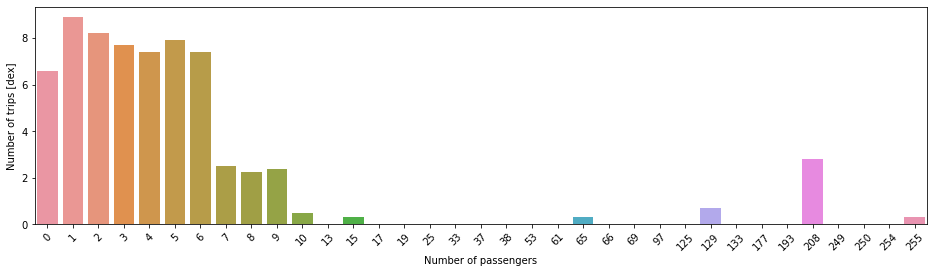

In [14]:
#Get number of unique trips with certain number of passengers
num_passengers = df_filtered.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

In [15]:
# Filtered based on the number of passengers
df_filtered = df_filtered[(df_filtered.passenger_count>0) & (df_filtered.passenger_count<7)]

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     9.09s =  0.2m =  0.0h
 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


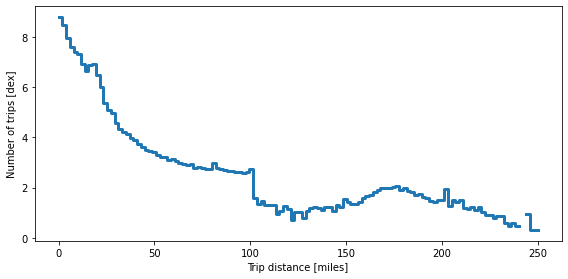

In [16]:
# Plot the distribution of distances.
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_distance', limits=[0, 250], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [17]:
# What is the largest distance?
max_trip_distance = df_filtered.trip_distance.max().astype('int')

print(f'The largest distance in the data is {max_trip_distance} miles')

The largest distance in the data is 198623008 miles


In [18]:
df_filtered = df_filtered[(df_filtered.trip_distance > 0) & (df_filtered.trip_distance < 100) ]

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :    34.40s =  0.6m =  0.0h
 

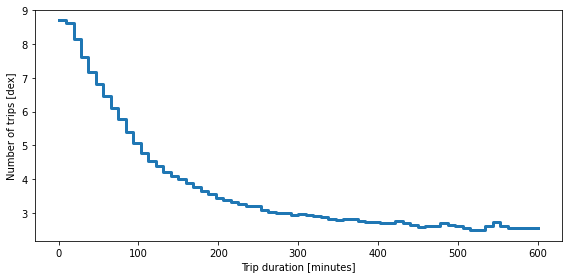

In [19]:
# Plot the distribution of trip durations
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_duration_min', limits=[0, 600], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Trip duration [minutes]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [20]:
# Minimum and maximum average speed of a taxi trip
print('Minimal mean speed: %.3f miles/hour.' % (df_filtered.trip_speed_mph.min()))
print('maximal mean speed: %.3f miles/hour.' % (df_filtered.trip_speed_mph.max()))

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result_data = op['op'](a_data, b_data)


Minimal mean speed: -3600.000 miles/hour.
maximal mean speed: inf miles/hour.


/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :    40.35s =  0.7m =  0.0h
 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:161: RuntimeWarning: invalid value encountered in multiply
  xar = np.arange(N + 1) / (N - 0.) * (xmax - xmin) + xmin


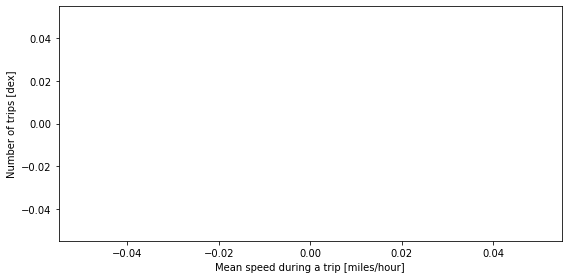

In [24]:
# Plot the distribution of trip durations
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_speed_mph', shape=64, lw=3, progress=True)
plt.xlabel('Mean speed during a trip [miles/hour]')
plt.ylabel('Number of trips [dex]')
plt.show()

[----------------------------------------]  0.00% estimated time: unknown                 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[----------------------------------------]  0.09% estimated time:   479.38s =  8.0m =  0.1h 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result_data = op['op'](a_data, b_data)


[########################################] 100.00% elapsed time  :    39.82s =  0.7m =  0.0h 
 

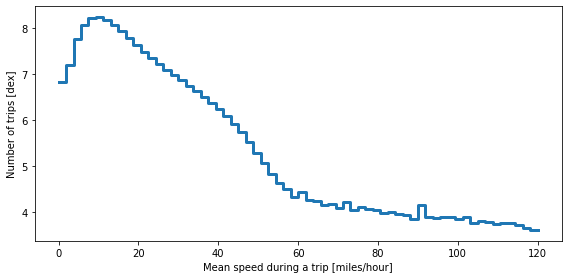

In [22]:
# Plot the distribution of trip durations
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_speed_mph', limits=[0, 120], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Mean speed during a trip [miles/hour]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [25]:
df_filtered = df_filtered[(df_filtered.trip_speed_mph > 1) & (df_filtered.trip_speed_mph < 60)]

[#---------------------------------------]  1.52% estimated time:    11.77s =  0.2m =  0.0h 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     8.89s =  0.1m =  0.0h 
[----------------------------------------]  0.09% estimated time:    58.13s =  1.0m =  0.0h 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)
/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     8.65s =  0.1m =  0.0h
[#---------------------------------------]  2.50% estimated time:     5.77s =  0.1m =  0.0h 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     8.94s =  0.1m =  0.0h
 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


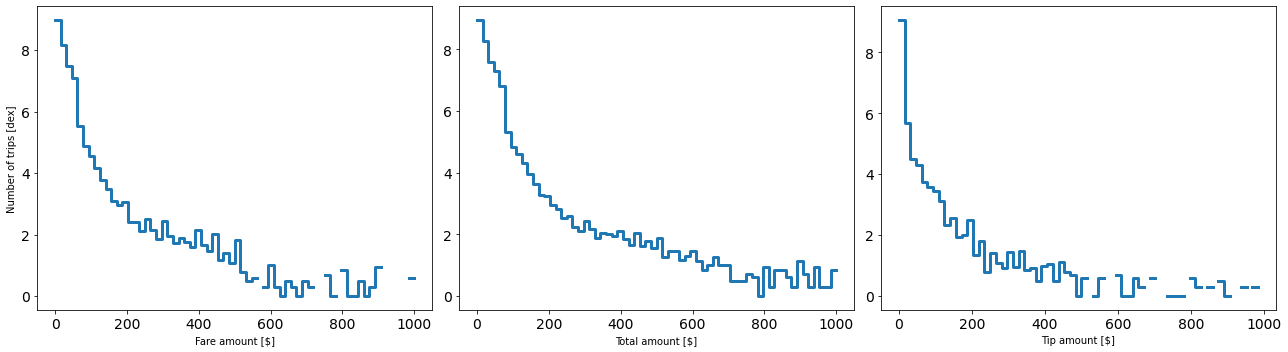

In [26]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
df_filtered.plot1d('fare_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Fare amount [$]')
plt.ylabel('Number of trips [dex]')
plt.tick_params(labelsize=14)

plt.subplot(132)
df_filtered.plot1d('total_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Total amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.subplot(133)
df_filtered.plot1d('tip_amount', shape=64, lw=3, limits=[0, 1000], f='log10', progress=True)
plt.xlabel('Tip amount [$]')
plt.ylabel('')
plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

In [27]:
df_filtered = df_filtered[((df_filtered.total_amount > 0) & (df_filtered.total_amount < 200) &
                           (df_filtered.fare_amount > 0) & (df_filtered.fare_amount < 200) &
                           (df_filtered.tip_amount >= 0) & (df_filtered.tip_amount < 200))]


In [28]:
N_samples = len(df_filtered)
print(f'Number of trips in the filtered dataset: {N_samples}')

Number of trips in the filtered dataset: 1129418209


# EDA

### Assignment

we are interested in finding out where the most optimal/hotspot places to pick up passengers from are located, which will lead to a larger taxi fee.

In [30]:
df_filtered['tip_percentage'] = df_filtered.tip_amount / df_filtered.total_amount * 100.0
df_filtered['fare_over_distance'] = df_filtered.fare_amount / df_filtered.trip_distance


/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


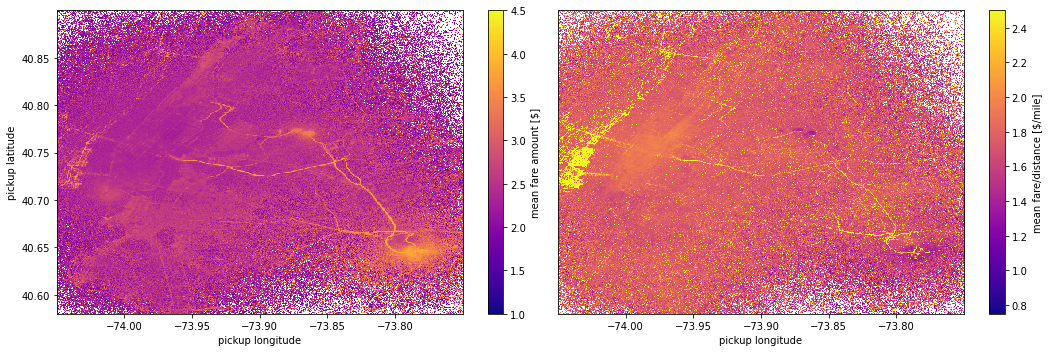

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
df_filtered.plot('pickup_longitude', 'pickup_latitude', what='mean(fare_amount)',
                 colormap='plasma', f='log1p', shape=512, colorbar=True,
                 colorbar_label='mean fare amount [$]', vmin=1, vmax=4.5)

plt.xlabel('pickup longitude')
plt.ylabel('pickup latitude')

plt.subplot(122)
df_filtered.plot('pickup_longitude', 'pickup_latitude', what='mean(fare_over_distance)',
                 colormap='plasma', f='log1p', shape=512, colorbar=True,
                 colorbar_label='mean fare/distance [$/mile]', vmin=0.75, vmax=2.5)

plt.xlabel('pickup longitude')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)


plt.tight_layout()
plt.show()

### Assignment

When is the best time to work

In [32]:
# Extract some date/time features
df_filtered['pickup_hour'] = df_filtered.pickup_datetime.dt.hour
df_filtered['pickup_day_of_week'] = df_filtered.pickup_datetime.dt.dayofweek
df_filtered['pickup_month'] = df_filtered.pickup_datetime.dt.month - 1  # to count from zero
df_filtered['pickup_is_weekend'] = (df_filtered.pickup_day_of_week>=5)

# Treat these columns as label/ordinal encoded values
df_filtered.categorize(column='pickup_hour')
df_filtered.categorize(column='pickup_day_of_week')
df_filtered.categorize(column='pickup_month')

# Helper lists for labelling the plots
label_month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
label_day_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


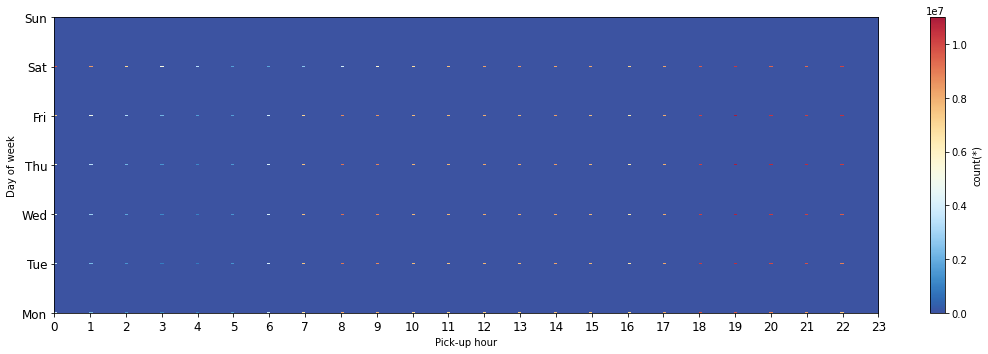

In [39]:
# Plot number of taxi trips per hours vs day of week
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
df_filtered.plot('pickup_hour', 'pickup_day_of_week', what='mean(trip_duration_min)',
                 colorbar_label='trip duration [min]', colorbar=True, colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Pick-up hour')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

## Expensive computations

In [ ]:
# arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# Expression to be executed with numpy - the default option
# df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude,
#                                            df_filtered.pickup_latitude,
#                                            df_filtered.dropoff_longitude,
#                                            df_filtered.dropoff_latitude)

# Expression to be pre-compiled with numba, and then executed
df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude,
                                           df_filtered.pickup_latitude,
                                           df_filtered.dropoff_longitude,
                                           df_filtered.dropoff_latitude).jit_numba()

# Expression to be pre-compiled with CUDA, and then executed on you GPU
# provided you have a CUDA compatible NVIDIA GPU.
# df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude,
#                                            df_filtered.pickup_latitude,
#                                            df_filtered.dropoff_longitude,
#                                            df_filtered.dropoff_latitude).jit_cuda()

[----------------------------------------]  0.09% estimated time:   141.29s =  2.4m =  0.0h 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     8.67s =  0.1m =  0.0h
[----------------------------------------]  0.00% estimated time: unknown                 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :    45.61s =  0.8m =  0.0h  
[----------------------------------------]  0.00% estimated time: unknown                 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)
/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :    55.33s =  0.9m =  0.0h
 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


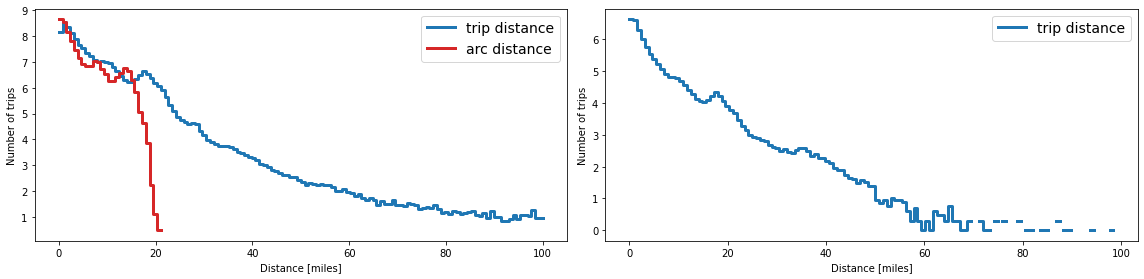

In [41]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
df_filtered.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0',
                   label='trip distance', progress=True)
df_filtered.plot1d('arc_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C3',
                   label='arc distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')


plt.subplot(122)
df_filtered.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0',
                   selection='arc_distance<0.06', label='trip distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')


plt.show()

In [42]:
df_filtered['pickup_year'] = df_filtered.pickup_datetime.dt.year
df_groupby_year = df_filtered.groupby(by=df_filtered.pickup_year,
                                      agg={'count': vaex.agg.count(),
                                           'trip_distance': vaex.agg.mean('trip_distance'),
                                           'arc_distance': vaex.agg.mean('arc_distance'),
                                           'tip_amount': vaex.agg.mean('tip_amount'),
                                           'tip_percentage': vaex.agg.mean('tip_percentage'),
                                           'fare_amount': vaex.agg.mean('fare_amount'),
                                           'total_amount': vaex.agg.mean('total_amount'),
                                           'passenger_count': vaex.agg.sum('passenger_count')})

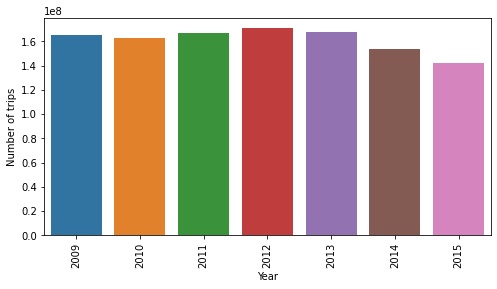

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_groupby_year.pickup_year.values, y=df_groupby_year['count'].values)
plt.xlabel('Year')
plt.ylabel('Number of trips')
plt.xticks(rotation='vertical')
plt.show()

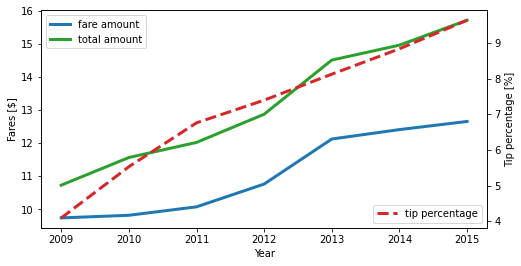

In [44]:
plt.figure(figsize=(8,4))
plt.plot(df_groupby_year.pickup_year.values,
         df_groupby_year.fare_amount.values,
         lw=3, color='C0', label='fare amount')
plt.plot(df_groupby_year.pickup_year.values,
         df_groupby_year.total_amount.values,
         lw=3, color='C2', label='total amount')
plt.xlabel('Year')
plt.ylabel('Fares [$]')
plt.legend()

plt.twinx()
plt.plot(df_groupby_year.pickup_year.values,
         df_groupby_year.tip_percentage.values,
         lw=3, ls='--', color='C3', label='tip percentage')

plt.legend(loc=4)
plt.ylabel('Tip percentage [%]')
plt.xticks(rotation='vertical')
plt.show()

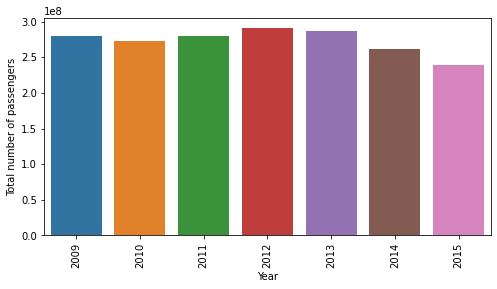

In [45]:
# Total number of passengers transported.

plt.figure(figsize=(8,4))
sns.barplot(x=df_groupby_year.pickup_year.values, y=df_groupby_year.passenger_count.values)
plt.xlabel('Year')
plt.ylabel('Total number of passengers')
plt.xticks(rotation='vertical')
plt.show()

# Modelling

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
features = [col for col in df_filtered.column_names if col not in ['fare_amount','total_amount']]

x_train = df_filtered[features]

#Take only 1st million rows
n_rows = 1000000
x_train = x_train[:n_rows]

ERROR:MainThread:vaex.execution:nested execute call
ERROR:vaex.execution:nested execute call


RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3840643084.py", line 4, in <module>
    print(df_filtered[['total_amount']])
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3906, in __str__
    return self._head_and_tail_table(format='plain')
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3662, in _head_and_tail_table
    N = _len(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 67, in _len
    return o.__len__()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())

current trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/4103474200.py", line 9, in <module>
    x_train = x_train[:n_rows]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 5012, in __getitem__
    stop = min(stop, len(self))
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())


In [75]:
y_train = df_filtered[['fare_amount']]
y_train = y_train[:n_rows]

mse_scorer = make_scorer(mean_squared_error)

ERROR:MainThread:vaex.execution:nested execute call
ERROR:vaex.execution:nested execute call


RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3840643084.py", line 4, in <module>
    print(df_filtered[['total_amount']])
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3906, in __str__
    return self._head_and_tail_table(format='plain')
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3662, in _head_and_tail_table
    N = _len(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 67, in _len
    return o.__len__()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())

current trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/494791997.py", line 2, in <module>
    y_train = y_train[:n_rows]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 5012, in __getitem__
    stop = min(stop, len(self))
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())


In [76]:
# Function to print cross-validated mean abs deviation
def cv_mse(regressor, x, y, cv=3, scorer=mse_scorer):
    scores = cross_val_score(regressor,
                             x, y, cv=cv,
                             scoring=scorer)
    print('MSE:', scores.mean())

In [77]:
from sklearn.dummy import DummyRegressor
cv_mse(DummyRegressor(), x_train, y_train, 3, mse_scorer)

ERROR:MainThread:vaex.execution:nested execute call
ERROR:vaex.execution:nested execute call


RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3840643084.py", line 4, in <module>
    print(df_filtered[['total_amount']])
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3906, in __str__
    return self._head_and_tail_table(format='plain')
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3662, in _head_and_tail_table
    N = _len(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 67, in _len
    return o.__len__()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())

current trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/1341350521.py", line 2, in <module>
    cv_mse(DummyRegressor(), x_train, y_train, 3, mse_scorer)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3078568989.py", line 5, in cv_mse
    scoring=scorer)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 450, in cross_val_score
    error_score=error_score)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 235, in cross_validate
    X, y, groups = indexable(X, y, groups)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 356, in indexable
    check_consistent_length(*result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in check_consistent_length
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in <listcomp>
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 257, in _num_samples
    if hasattr(x, 'shape') and x.shape is not None:
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 5771, in shape
    return (len(self), len(self.get_column_names()))
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())


In [78]:
from sklearn.isotonic import IsotonicRegression

# Distance between pickup and dropoff locations
dist = np.sqrt(
    np.power(x_train['pickup_longitude'] -
             x_train['dropoff_longitude'], 2) +
    np.power(x_train['pickup_latitude'] -
             x_train['dropoff_latitude'], 2))

# MAE from using just distance as predictor
cv_mse(IsotonicRegression(out_of_bounds='clip'),
       dist, y_train)

ERROR:MainThread:vaex.execution:nested execute call
ERROR:vaex.execution:nested execute call


RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3840643084.py", line 4, in <module>
    print(df_filtered[['total_amount']])
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3906, in __str__
    return self._head_and_tail_table(format='plain')
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3662, in _head_and_tail_table
    N = _len(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 67, in _len
    return o.__len__()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())

current trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/4160819892.py", line 12, in <module>
    dist, y_train)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3078568989.py", line 5, in cv_mse
    scoring=scorer)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 450, in cross_val_score
    error_score=error_score)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 235, in cross_validate
    X, y, groups = indexable(X, y, groups)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 356, in indexable
    check_consistent_length(*result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in check_consistent_length
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in <listcomp>
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 251, in _num_samples
    if not hasattr(x, '__len__') and not hasattr(x, 'shape'):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/expression.py", line 321, in shape
    return self.df._shape_of(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1977, in _shape_of
    rows = len(self) if filtered else self.length_unfiltered()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())


In [79]:
from catboost import CatBoostRegressor

# Cross-validated MSE w/ CatBoost
cv_mse(CatBoostRegressor(),
       x_train, y_train)

ERROR:MainThread:vaex.execution:nested execute call
ERROR:vaex.execution:nested execute call


RuntimeError: nested execute call: False True
last trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3840643084.py", line 4, in <module>
    print(df_filtered[['total_amount']])
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3906, in __str__
    return self._head_and_tail_table(format='plain')
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3662, in _head_and_tail_table
    N = _len(self)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 67, in _len
    return o.__len__()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())

current trace:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 667, in start
    self.io_loop.start()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
    await self.process_one()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 445, in process_one
    await dispatch(*args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
    await result
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
    reply_content = await reply_content
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/2071956459.py", line 5, in <module>
    x_train, y_train)
  File "/var/folders/l7/j9dfdmsn1dlbqh7v6btfq1kh0000gn/T/ipykernel_4249/3078568989.py", line 5, in cv_mse
    scoring=scorer)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 450, in cross_val_score
    error_score=error_score)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 235, in cross_validate
    X, y, groups = indexable(X, y, groups)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 356, in indexable
    check_consistent_length(*result)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in check_consistent_length
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 316, in <listcomp>
    lengths = [_num_samples(X) for X in arrays if X is not None]
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/sklearn/utils/validation.py", line 257, in _num_samples
    if hasattr(x, 'shape') and x.shape is not None:
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 5771, in shape
    return (len(self), len(self.get_column_names()))
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 3998, in __len__
    self. _cached_filtered_length = int(self.count())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 799, in count
    return self._compute_agg('count', expression, binby, limits, shape, selection, delay, edges, progress, array_type=array_type)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 773, in _compute_agg
    return self._delay(delay, var)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 1537, in _delay
    self.execute()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 375, in execute
    just_run(self.execute_async())
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/asyncio.py", line 35, in just_run
    return loop.run_until_complete(coro)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 64, in run_until_complete
    self._run_once()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 100, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/nest_asyncio.py", line 169, in step
    step_orig(task, exc)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/tasks.py", line 249, in __step
    result = coro.send(None)
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/dataframe.py", line 380, in execute_async
    await self.executor.execute_async()
  File "/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/execution.py", line 132, in execute_async
    trace = ''.join(traceback.format_stack())


## Heteroskedasticity

Heteroskedasticity is when the variance of the target feature changes as a function of the features.

Is the target feature heteroskedastic?

